In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
mb= pd.read_csv('mobile.csv')
mb.head(8)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0


In [4]:
mb.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
mb.shape

(2000, 21)

In [6]:
mb.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
# duplicates
mb.duplicated().sum()

0

## EDA- find avg ram based in price range falling in 
mb.groupby('price_range')['ram'].mean()


In [8]:
# EDA- find avg batteery pwr based in price range falling in 
mb.groupby('price_range')['battery_power'].mean()

price_range
0    1116.902
1    1228.868
2    1228.320
3    1379.984
Name: battery_power, dtype: float64

In [9]:
mb.price_range.value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

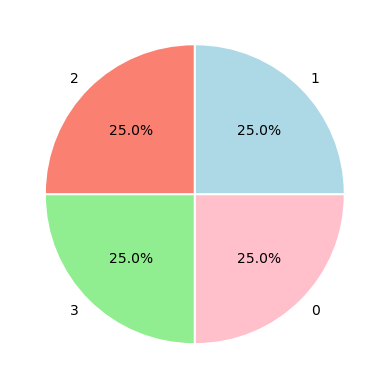

In [10]:
price=mb.price_range.value_counts()
colors= ['lightblue','salmon','lightgreen','pink']
plt.pie(price.values, labels=price.index,autopct='%0.1f%%',colors= colors,
        explode=[0.01,0.01,0.01,0.01])
plt.show()

In [11]:
blth= mb.blue.value_counts()
blth

blue
0    1010
1     990
Name: count, dtype: int64

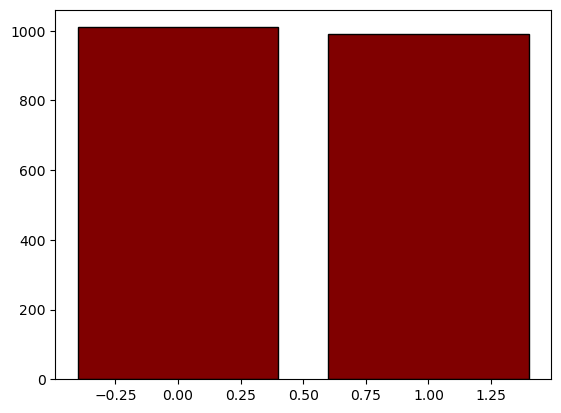

In [12]:
plt.bar((blth.index),blth.values,color= 'maroon', edgecolor= 'black')
plt.show()

In [13]:
wfi= mb.wifi.value_counts()
wfi

wifi
1    1014
0     986
Name: count, dtype: int64

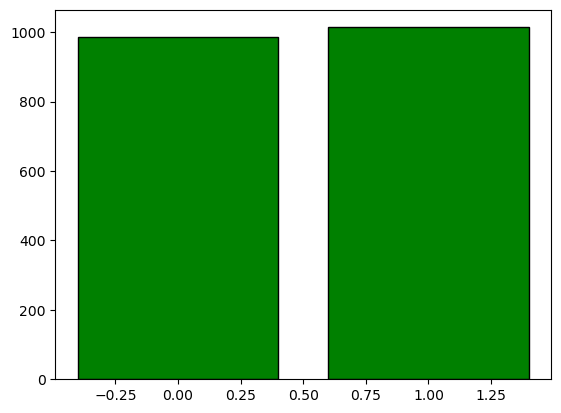

In [14]:
plt.bar((wfi.index),wfi.values,color= 'green', edgecolor= 'black')
plt.show()

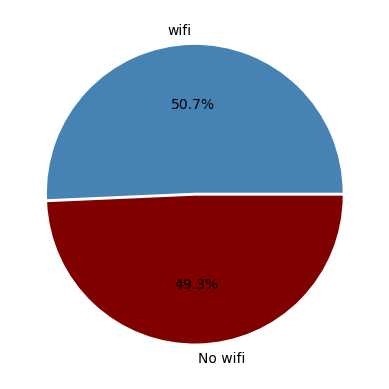

In [15]:
plt.pie(wfi.values, labels= ['wifi', 'No wifi'], colors= ['steelblue','maroon'],autopct= '%0.1f%%',
        explode=[0.01,0.01])
plt.show()

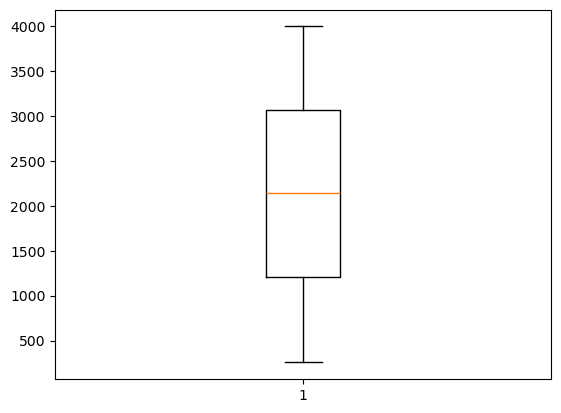

In [16]:
# box plot for ram
plt.boxplot(mb.ram)
plt.show()

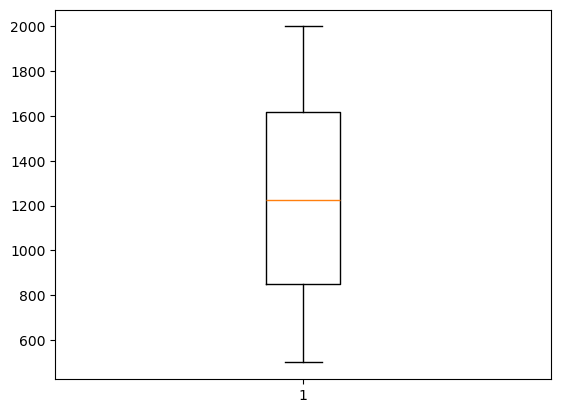

In [17]:
plt.boxplot(mb.battery_power)
plt.show()

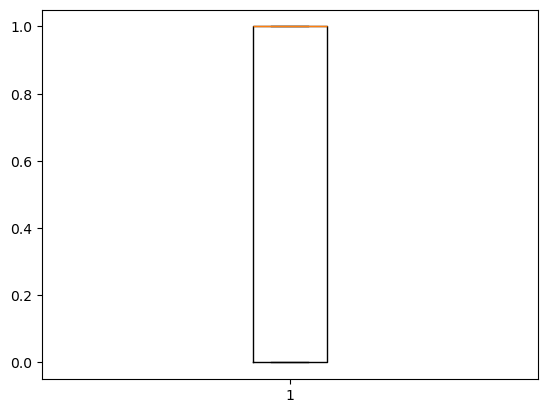

In [18]:
plt.boxplot(mb.dual_sim)
plt.show()

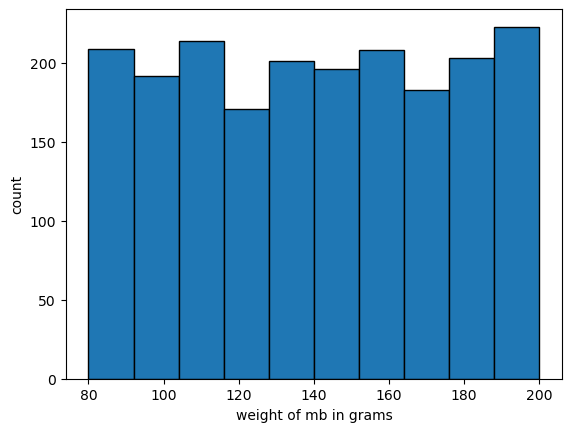

In [19]:
# mobile weight histogram
plt.hist(mb.mobile_wt,edgecolor= 'black')
plt.xlabel('weight of mb in grams')
plt.ylabel('count')
plt.show()

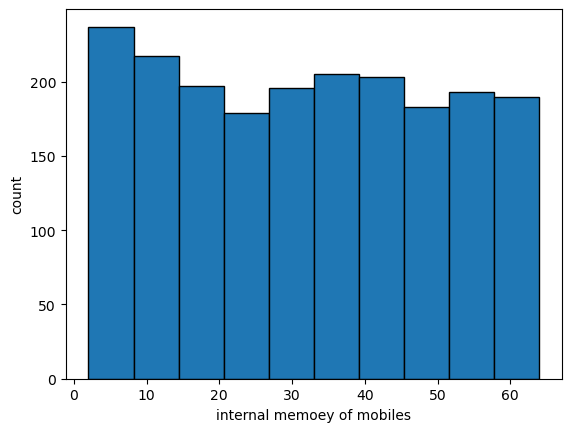

In [20]:
plt.hist(mb.int_memory,edgecolor= 'black')
plt.xlabel('internal memoey of mobiles')
plt.ylabel('count')
plt.show()

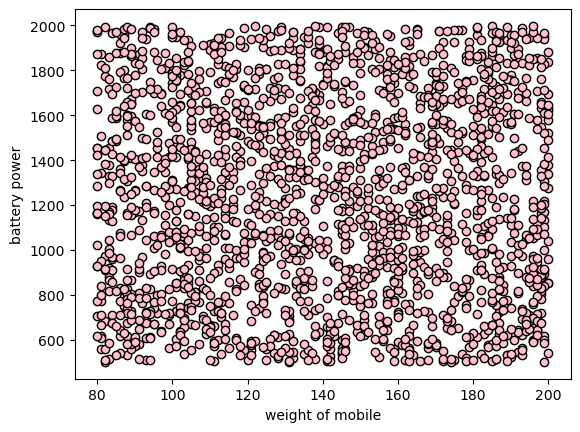

In [21]:
plt.scatter(mb.mobile_wt,mb.battery_power,color= 'pink', edgecolor= 'black')
plt.xlabel('weight of mobile')
plt.ylabel('battery power')
plt.show()

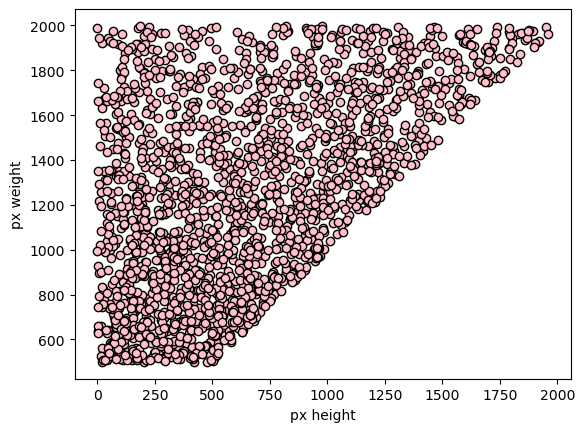

In [22]:
plt.scatter(mb.px_height,mb.px_width,color= 'pink', edgecolor= 'black')
plt.xlabel('px height')
plt.ylabel('px weight')
plt.show()

In [26]:
# machine learning spliting into input and out put
X= mb.iloc[: , :-1]
Y= mb.price_range

In [27]:
xtr,xts,ytr,yts= train_test_split(X,Y,test_size= 0.5)

In [39]:
accuracies= []
# applying logistic regression- logstic works ony with binary data set 
#here it wont work
model= LogisticRegression()
model.fit(xtr,ytr)
ypr = model.predict(xts)
accuracies.append(accuracy_score(yts,ypr)*100)
accuracies

[63.5]

In [40]:
#aplying decision tree
accus = []
for i in range(2,11):
    model= DecisionTreeClassifier(max_depth=i)
    model.fit(xtr,ytr)
    ypr = model.predict(xts)
    print(f' the accuracy of decision tree with depth{i} is {accuracy_score(yts,ypr)*100}')

 the accuracy of decision tree with depth2 is 74.5
 the accuracy of decision tree with depth3 is 74.8
 the accuracy of decision tree with depth4 is 78.7
 the accuracy of decision tree with depth5 is 83.89999999999999
 the accuracy of decision tree with depth6 is 81.89999999999999
 the accuracy of decision tree with depth7 is 83.0
 the accuracy of decision tree with depth8 is 82.1
 the accuracy of decision tree with depth9 is 81.5
 the accuracy of decision tree with depth10 is 80.0


In [41]:
model= DecisionTreeClassifier(max_depth=6)
model.fit(xtr,ytr)
ypr = model.predict(xts)
accuracies.append(accuracy_score(yts,ypr)*100)
accuracies

[63.5, 81.69999999999999]

In [42]:
# SVM
from sklearn.svm import SVC
model= SVC()
model.fit(xtr,ytr)
ypr = model.predict(xts)
accuracies.append(accuracy_score(yts,ypr)*100)
accuracies

[63.5, 81.69999999999999, 94.6]

In [43]:
# naive bias 
model= GaussianNB()
model.fit(xtr,ytr)
ypr = model.predict(xts)
accuracies.append(accuracy_score(yts,ypr)*100)
accuracies

[63.5, 81.69999999999999, 94.6, 78.10000000000001]

In [44]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
for i in range(2,11):
    model= KNeighborsClassifier(n_neighbors=i)
    model.fit(xtr,ytr)
    ypr = model.predict(xts)
    print(f' the accuracy of KNN with {i} is {accuracy_score(yts,ypr)*100}')

 the accuracy of KNN with 2 is 89.60000000000001
 the accuracy of KNN with 3 is 90.7
 the accuracy of KNN with 4 is 91.5
 the accuracy of KNN with 5 is 91.4
 the accuracy of KNN with 6 is 91.3
 the accuracy of KNN with 7 is 91.60000000000001
 the accuracy of KNN with 8 is 92.30000000000001
 the accuracy of KNN with 9 is 92.9
 the accuracy of KNN with 10 is 92.2


In [45]:
model= KNeighborsClassifier(n_neighbors=6)
model.fit(xtr,ytr)
ypr = model.predict(xts)
accuracies.append(accuracy_score(yts,ypr)*100)
accuracies

[63.5, 81.69999999999999, 94.6, 78.10000000000001, 91.3]

In [46]:
for i in range(2,11):
    model= RandomForestClassifier(max_depth=i)
    model.fit(xtr,ytr)
    ypr = model.predict(xts)
    print(f' the accuracy of Random forest with {i} is {accuracy_score(yts,ypr)*100}')

 the accuracy of Random forest with 2 is 76.0
 the accuracy of Random forest with 3 is 80.10000000000001
 the accuracy of Random forest with 4 is 80.60000000000001
 the accuracy of Random forest with 5 is 80.60000000000001
 the accuracy of Random forest with 6 is 83.0
 the accuracy of Random forest with 7 is 83.89999999999999
 the accuracy of Random forest with 8 is 84.2
 the accuracy of Random forest with 9 is 83.39999999999999
 the accuracy of Random forest with 10 is 84.6


In [47]:
model= RandomForestClassifier(max_depth=8)
model.fit(xtr,ytr)
ypr = model.predict(xts)
accuracies.append(accuracy_score(yts,ypr)*100)
accuracies

[63.5, 81.69999999999999, 94.6, 78.10000000000001, 91.3, 82.1]

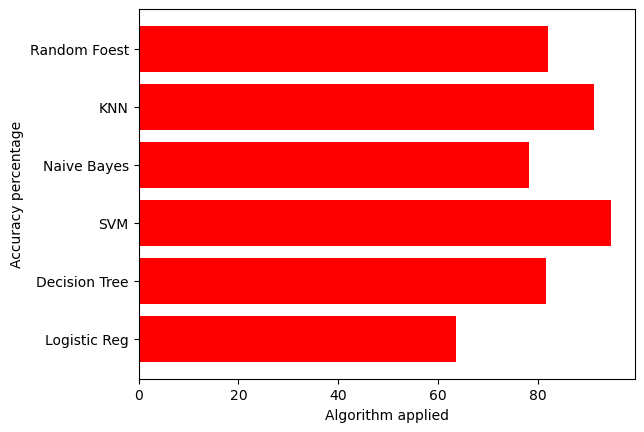

In [48]:
#  comparing all accuracies
ML_algo= ['Logistic Reg','Decision Tree','SVM','Naive Bayes','KNN','Random Foest']
plt.barh(ML_algo,accuracies,color= 'red')
plt.ylabel('Accuracy percentage')
plt.xlabel('Algorithm applied')
plt.show()